# Redes Neuronales Problema de Regresión - AutoMPG

## 1. Preparar los datos

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo


### 1.1. Obtener los datos

In [18]:
# Descargar el dataset Auto MPG
auto_mpg = fetch_ucirepo(id=9)
dataset = auto_mpg.data

display(dataset.features)
display(dataset.targets)

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1
394,97.0,4,52.0,2130,24.6,82,2
395,135.0,4,84.0,2295,11.6,82,1
396,120.0,4,79.0,2625,18.6,82,1


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [19]:
dataset.features.tail()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
393,140.0,4,86.0,2790,15.6,82,1
394,97.0,4,52.0,2130,24.6,82,2
395,135.0,4,84.0,2295,11.6,82,1
396,120.0,4,79.0,2625,18.6,82,1
397,119.0,4,82.0,2720,19.4,82,1


In [20]:
# Datos faltantes
print(dataset.features.isna().sum())

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [21]:
# Eliminar filas con datos perdidos
dataset.features = dataset.features.dropna()

In [22]:
# Manejo de datos categóricos
origin = dataset.features.pop('origin')

dataset.features['USA'] = (origin == 1)*1.0
dataset.features['Europe'] = (origin == 2)*1.0
dataset.features['Japan'] = (origin == 3)*1.0

In [23]:
dataset.features.tail()

,displacement,cylinders,horsepower,weight,acceleration,model_year,USA,Europe,Japan
393,140.0,4,86.0,2790,15.6,82,1.0,0.0,0.0
394,97.0,4,52.0,2130,24.6,82,0.0,1.0,0.0
395,135.0,4,84.0,2295,11.6,82,1.0,0.0,0.0
396,120.0,4,79.0,2625,18.6,82,1.0,0.0,0.0
397,119.0,4,82.0,2720,19.4,82,1.0,0.0,0.0


### 1.2. Separar los datos para entrenar y evaluar el modelo

In [24]:
# Introducir la columna de etiquetas en el dataset para realizar correctamente la partición de datos
dataset.features['MPG'] = dataset.targets
dataset = dataset.features

display(dataset)

,displacement,cylinders,horsepower,weight,acceleration,model_year,USA,Europe,Japan,MPG
0,307.0,8,130.0,3504,12.0,70,1.0,0.0,0.0,18.0
1,350.0,8,165.0,3693,11.5,70,1.0,0.0,0.0,15.0
2,318.0,8,150.0,3436,11.0,70,1.0,0.0,0.0,18.0
3,304.0,8,150.0,3433,12.0,70,1.0,0.0,0.0,16.0
4,302.0,8,140.0,3449,10.5,70,1.0,0.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1.0,0.0,0.0,27.0
394,97.0,4,52.0,2130,24.6,82,0.0,1.0,0.0,44.0
395,135.0,4,84.0,2295,11.6,82,1.0,0.0,0.0,32.0
396,120.0,4,79.0,2625,18.6,82,1.0,0.0,0.0,28.0


In [25]:
# Separar conjunto de datos en train y test
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# Obtener la columna de etiquetas de train y test
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [27]:
# Dimensiones de cada bloque anterior
print("Datos entrenamiento:", train_dataset.shape)
print("Datos prueba:", test_dataset.shape)
print("Etiquetas entrenamiento:", train_labels.shape)
print("Etiquetas prueba:", test_labels.shape)

Datos entrenamiento: (314, 9)
Datos prueba: (78, 9)
Etiquetas entrenamiento: (314,)
Etiquetas prueba: (78,)


In [29]:
# Estadísticas de los datos
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
model_year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [30]:
# Normalizar los datos de entrada
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [31]:
# Visualización de los datos normalizados
normed_train_stats = normed_train_data.describe().transpose()
normed_train_stats

,count,mean,std,min,25%,50%,75%,max
displacement,314.0,8.627211e-17,1.0,-1.220325,-0.860894,-0.424785,0.675074,2.489002
cylinders,314.0,1.824443e-16,1.0,-1.457657,-0.869348,-0.869348,1.483887,1.483887
horsepower,314.0,-9.900078e-18,1.0,-1.545283,-0.751241,-0.272190,0.607162,3.153347
weight,314.0,-8.485781e-17,1.0,-1.589352,-0.869478,-0.198782,0.732017,2.547401
acceleration,314.0,-5.148041e-16,1.0,-2.710152,-0.630725,-0.021237,0.588250,3.313017
model_year,314.0,9.772791e-16,1.0,-1.604642,-0.788458,0.027726,0.843910,1.660094
USA,314.0,7.920062e-17,1.0,-1.286751,-1.286751,0.774676,0.774676,0.774676
Europe,314.0,1.980016e-17,1.0,-0.465148,-0.465148,-0.465148,-0.465148,2.143005
Japan,314.0,5.374328e-17,1.0,-0.495225,-0.495225,-0.495225,-0.495225,2.012852


## 2. Desarrollar el modelo

### 2.1. Definir el modelo

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu',
                    input_shape=[len(train_dataset.keys())]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    return model

model = build_model()

c:\Mis Proyectos\Git\Books\Niflheim\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

### 2.2. Configuración del modelo

In [34]:
# Optimizador
optimizer = tf.keras.optimizers.RMSprop(0.001)

In [35]:
# Modelo
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

### 2.3. Entrenamiento del modelo

In [36]:
EPOCHS = 1000

print("[INFO] Entrenando Red Neuronal...")
history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split=0.2,
    verbose=1
)

[INFO] Entrenando Red Neuronal...
Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 592.3787 - mae: 23.2237 - mse: 592.8972 - val_loss: 561.7610 - val_mae: 22.4782 - val_mse: 562.0522
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 518.5896 - mae: 21.5785 - mse: 518.8419 - val_loss: 504.5757 - val_mae: 21.1824 - val_mse: 504.8795
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 450.2210 - mae: 20.0419 - mse: 450.0242 - val_loss: 446.5163 - val_mae: 19.7847 - val_mse: 446.8239
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 429.7554 - mae: 19.4514 - mse: 429.9424 - val_loss: 388.0767 - val_mae: 18.2463 - val_mse: 388.3769
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 359.6534 - mae: 17.5557 - mse: 359.9869 - val_loss: 327.1057 - val_mae: 16.5139 - val_mse: 327.3856
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 301.7010 - mae: 15.9503 - mse: 301.7405 - val_loss: 264.8525 - val_mae: 14.6388 - val_mse: 265.0968
Epoch 7/1000
8/8 

## 3. Evaluación del modelo

### 3.1. Visualización del proceso de entrenamiento

In [37]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.571034,1.002325,2.594108,10.058212,2.391185,10.011841,995
996,2.621253,1.041665,2.595959,10.922266,2.555155,10.869637,996
997,2.641343,0.989978,2.564039,10.873809,2.445980,10.838694,997
998,2.688576,1.054489,2.722964,10.569472,2.517468,10.517690,998
999,2.598500,1.006364,2.618793,10.210835,2.476453,10.158263,999


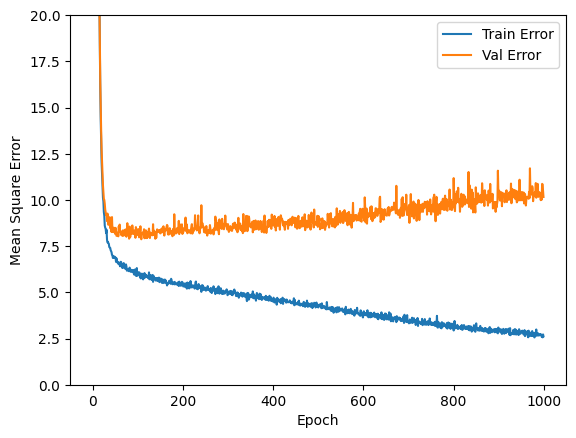

In [39]:
# Representación gráfica
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
             label='Val Error')
    plt.ylim([0, 20])
    plt.legend()
    plt.show()

plot_history(history=history)

### 3.2. Early Stopping

In [43]:
# Modelo e hiperparámetros
optimizer = tf.keras.optimizers.RMSprop(0.001)

model = build_model()

model.compile(
    loss='mse',
    optimizer=optimizer,
    metrics=['mae', 'mse']
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10
)

# Entrenamiento de la red neuronal
print("[INFO] Entrenando Red Neuronal...")
history = model.fit(normed_train_data, train_labels,
                    epochs=EPOCHS, validation_split=0.2,
                    verbose=0, callbacks=[early_stop])

c:\Mis Proyectos\Git\Books\Niflheim\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[INFO] Entrenando Red Neuronal...


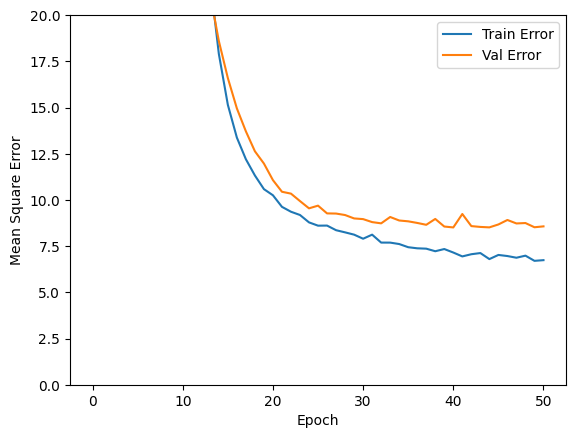

In [44]:
# Visualización del resultado
plot_history(history)

### 3.3. Evaluación del modelo con los datos de prueba

In [45]:
loss, mse, mae = model.evaluate(normed_test_data, test_labels)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Sqr Error: {:5.2f} MPG".format(mse))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2703 - mae: 1.7365 - mse: 5.0502 
Testing set Mean Abs Error:  5.67 MPG
Testing set Mean Sqr Error:  1.85 MPG
